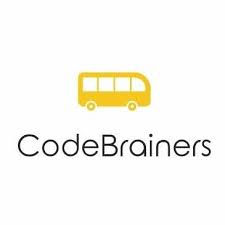

# SQL - Interfejs Pythona dla baz danych SQLite

_Mikołaj Leszczuk_

* Interfejs sqlite3
* Zadania utrwalające
* Test
* Materiały dodatkowe

## Interfejs sqlite3

Interfejs sqlite3 to biblioteka C, która zapewnia lekką dyskową bazę danych, która nie wymaga oddzielnego procesu serwera i umożliwia dostęp do bazy danych przy użyciu niestandardowego wariantu języka zapytań SQL. Niektóre aplikacje mogą używać sqlite3 do wewnętrznego przechowywania danych. Możliwe jest również prototypowanie aplikacji przy użyciu sqlite3, a następnie przeniesienie kodu do większej bazy danych, takiej jak PostgreSQL lub Oracle.

Moduł sqlite3 został napisany przez Gerharda Häringa. Zapewnia interfejs SQL zgodny ze specyfikacją DB-API 2.0 opisaną w [PEP 249](https://www.python.org/dev/peps/pep-0249).

Aby użyć modułu, musisz najpierw utworzyć obiekt [`Connection`](https://docs.python.org/3/library/sqlite3.html#sqlite3.Connection), który reprezentuje bazę danych. Tutaj dane zostaną zapisane w pliku `example.db`:

In [9]:
import os
os.remove('example.db')

In [10]:
import sqlite3
conn = sqlite3.connect('example.db')

Możesz również podać specjalną nazwę `:memory:` aby utworzyć bazę danych w pamięci RAM.

Gdy masz już połączenie ([`Connection`](https://docs.python.org/3/library/sqlite3.html#sqlite3.Connection)), możesz utworzyć obiekt [Cursor](https://docs.python.org/3/library/sqlite3.html#sqlite3.Cursor) i wywołać jego metodę [execute()](https://docs.python.org/3/library/sqlite3.html#sqlite3.Cursor.execute) w celu wykonania poleceń SQL:

In [11]:
c = conn.cursor()

Utwórz tabelę:

In [12]:
c.execute('''CREATE TABLE stocks
             (date text, trans text, symbol text, qty real, price real)''')

Wstaw wiersz danych:

In [13]:
c.execute("INSERT INTO stocks VALUES ('2006-01-05','BUY','RHAT',100,35.14)")

Zapisz (zatwierdź, ang. _commit_) zmiany:

In [14]:
conn.commit()

Możemy również zamknąć połączenie, jeśli skończymy.

Tylko upewnij się, że wszelkie zmiany zostały wprowadzone, w przeciwnym razie zostaną utracone:

In [15]:
conn.close()

Zapisane dane są trwałe i są dostępne w kolejnych sesjach:

In [114]:
import sqlite3
conn = sqlite3.connect('example.db')
c = conn.cursor()

Nigdy tego nie rób (niepewne!):

In [115]:
symbol = 'RHAT'
c.execute("SELECT * FROM stocks WHERE symbol = '%s'" % symbol)

Zrób to zamiast tego:

In [116]:
t = ('RHAT',)
c.execute('SELECT * FROM stocks WHERE symbol=?', t)
print(c.fetchone())

('2006-01-05', 'BUY', 'RHAT', 100.0, 35.14)


Argument `execute`, który reprezentuje wartości, które chcesz wstawić do bazy danych, powinien być krotką (sekwencją)!

Większy przykład, który wstawia wiele rekordów naraz:

In [20]:
purchases = [('2006-03-28', 'BUY', 'IBM', 1000, 45.00),
             ('2006-04-05', 'BUY', 'MSFT', 1000, 72.00),
             ('2006-04-06', 'SELL', 'IBM', 500, 53.00),
            ]
c.executemany('INSERT INTO stocks VALUES (?,?,?,?,?)', purchases)

Aby pobrać dane po wykonaniu instrukcji SELECT, możesz traktować kursor jako [iterator](https://docs.python.org/3/glossary.html#term-iterator), wywołać metodę [`fetchone()`](https://docs.python.org/3/library/sqlite3.html#sqlite3.Cursor.fetchone) kursora w celu pobrania pojedynczego pasującego wiersza lub wywołać funkcję [`fetchall()`](https://docs.python.org/3/library/sqlite3.html#sqlite3.Cursor.fetchall) w celu uzyskania listy pasujących wierszy.

W tym przykładzie zastosowano formę iteratora:

In [21]:
for row in c.execute('SELECT * FROM stocks ORDER BY price'):
    print(row)

('2006-01-05', 'BUY', 'RHAT', 100.0, 35.14)
('2006-03-28', 'BUY', 'IBM', 1000.0, 45.0)
('2006-04-06', 'SELL', 'IBM', 500.0, 53.0)
('2006-04-05', 'BUY', 'MSFT', 1000.0, 72.0)


Metoda **`iterdump()`** zwraca iterator do zrzutu bazy danych w formacie tekstowym SQL. Przydatne podczas zapisywania bazy danych w pamięci w celu późniejszego przywrócenia.

Można więc napisać program w Pythonie, aby utworzyć kopię zapasową bazy danych SQLite:

In [121]:
import sqlite3
import io
conn = sqlite3.connect('CodeBrainers.db')
with io.open('CodeBrainers_dump.sql', 'w') as f:
    for line in conn.iterdump():
        f.write('%s\n' % line)
print('Kopia zapasowa została wykonana pomyślnie.')
print('Zapisano jako CodeBrainers_dump.sql')
conn.close()

Kopia zapasowa została wykonana pomyślnie.
Zapisano jako CodeBrainers_dump.sql


## Zadania utrwalające

Python i baza danych SQLite - ćwiczenia i praktyka

### Utwórz połączenie bazy danych SQLite z bazą danych znajdującą się w pamięci

Napisz program w języku Python, aby utworzyć połączenie bazy danych SQLite z bazą danych znajdującą się w pamięci.

---

**Kod Pythona (przykładowe rozwiązanie i przykładowe dane wyjściowe):**

In [59]:
import sqlite3
conn = sqlite3.connect(':memory:')
print("Baza danych pamięci utworzona i połączona z SQLite.")
conn.close()
print("Połączenie SQLite jest zamknięte.")

Baza danych pamięci utworzona i połączona z SQLite.
Połączenie SQLite jest zamknięte.


### Utwórz bazę danych SQLite i połącz się z bazą danych oraz wydrukuj wersje

Napisz program w Pythonie, aby utworzyć bazę danych SQLite w pliku i połączyć się z bazą danych oraz wydrukować wersję bazy danych SQLite i numer wersji modułu sqlite3 w postaci ciągu.

Podpowiedzi:
* Funkcja SQLite **sqlite_version()** zwraca ciąg znaków wersji dla uruchomionej biblioteki SQLite.
* Funkcja Pythona `sqlite3.`**`version`** zwraca numer wersji modułu sqlite3 w postaci ciągu. To nie jest wersja biblioteki SQLite!

---

**Kod Pythona (przykładowe rozwiązanie i przykładowe dane wyjściowe):**

In [56]:
import sqlite3
conn = sqlite3.connect('temp.db')
c = conn.cursor()
print("Baza danych stworzona i połączona z SQLite.")
query = "SELECT sqlite_version();"
c.execute(query)
record = c.fetchall()
print("Wersja bazy danych SQLite to: ", record)
print("Wersja modułu sqlite3 to: ", sqlite3.version)
conn.close()
print("Połączenie SQLite jest zamknięte.")

Baza danych stworzona i połączona z SQLite.
Wersja bazy danych SQLite to:  [('3.33.0',)]
Wersja modułu sqlite3 to:  2.6.0
Połączenie SQLite jest zamknięte.


### Utwórz bazę danych SQLite, połącz się z bazą danych oraz zabezpiecz się przed wyjątkami

Napisz program w Pythonie, aby utworzyć bazę danych SQLite i połączyć się z bazą danych oraz zabezpieczyć się przed wyjątkami. Wywołaj sztucznie wyjątek, wykonując błędne zapytanie.

Podpowiedź: _wyjątek_ `sqlite3.`**`Error`** jest to klasa bazowa pozostałych wyjątków w module sqlite3. Jest to zarazem podklasa [`Exception`](https://docs.python.org/3/library/exceptions.html#Exception).

---

**Kod Pythona (przykładowe rozwiązanie i przykładowe dane wyjściowe):**

In [60]:
import sqlite3
try:
    conn = sqlite3.connect(':memory:')
    c = conn.cursor()
    print("Baza danych stworzona i połączona z SQLite.")
    # c.execute("SELECT * FROM users;")
except sqlite3.Error as error:
    print("Błąd podczas łączenia się z SQLite", error)
finally:
    conn.close()
    print("Połączenie SQLite jest zamknięte.")

Baza danych stworzona i połączona z SQLite.
Połączenie SQLite jest zamknięte.


### Utwórz tabelę w bazie danych SQLite

Napisz program w Pythonie, aby połączyć bazę danych SQLite, utworzyć tabelę w bazie danych i zweryfokować jej utworzenie.

Podpowiedź: Każda baza danych SQLite zawiera pojedynczą „tabelę schematów”, która przechowuje schemat tej bazy danych. Schemat bazy danych to opis wszystkich innych tabel, indeksów, wyzwalaczy i widoków zawartych w bazie danych. Tabela schematów wygląda następująco:

```sqlite
CREATE TABLE sqlite_schema(
  type text,
  name text,
  tbl_name text,
  rootpage integer,
  sql text
);
```

Tabela `sqlite_schema` zawiera po jednym wierszu dla każdej tabeli, indeksu, widoku i wyzwalacza (zbiorczo „obiekty”) w schemacie, z wyjątkiem tego, że nie ma wpisu dla samej tabeli `sqlite_schema`. Zapoznaj się z podsekcją dotyczącą [przechowywania schematów](https://www.sqlite.org/fileformat2.html#ffschema) w dokumentacji [formatu plików](https://www.sqlite.org/fileformat2.html), aby uzyskać dodatkowe informacje o tym, jak program SQLite używa wewnętrznie tabeli `sqlite_schema`.

---

**Kod Pythona (przykładowe rozwiązanie i przykładowe dane wyjściowe):**

In [74]:
import sqlite3
conn = sqlite3.connect(':memory:')
c = conn.cursor()
c.execute("CREATE TABLE users(login VARCHAR(8) NOT NULL, name VARCHAR(40) NOT NULL, phone_no VARCHAR(15));")
print("Utworzono tabelę Users.")
c.execute("SELECT * FROM sqlite_schema;")
record = c.fetchall()
print(record)
conn.close()
print("Połączenie SQLite jest zamknięte.")

Utworzono tabelę Users.
[('table', 'users', 'users', 2, 'CREATE TABLE users(login VARCHAR(8) NOT NULL, name VARCHAR(40) NOT NULL, phone_no VARCHAR(15))')]
Połączenie SQLite jest zamknięte.


### Wypisz zawartość tabel z pliku bazy danych SQLite CodeBrainers

Napisz program w Pythonie, który wyświetli listy zawartości tabel pliku bazy danych SQLite CodeBrainers.

---

**Kod Pythona (przykładowe rozwiązanie i przykładowe dane wyjściowe):**

In [71]:
import sqlite3
conn = sqlite3.connect('CodeBrainers.db')
c = conn.cursor()
print("Wykaz zawartości tabel:")
c.execute("SELECT * FROM product")
print(c.fetchall())
c.execute("SELECT * FROM customer")
print(c.fetchall())
c.execute("SELECT * FROM order_product")
print(c.fetchall())
conn.close()
print("Połączenie SQLite jest zamknięte.")

Wykaz zawartości tabel:
[(5, 'Spodnie', 100.0, 5, '2011-02-01'), (6, 'Bluza', 60.0, 2, '2011-02-12')]
[(1, 'Adam', 'Lublin', '2011-02-05'), (2, 'Monika', 'Gdynia', '2011-02-19'), (3, 'Natalia', 'Zakopane', '2011-02-23'), (4, 'Katarzyna', 'Lublin', '2011-03-08'), (5, 'Marcin', 'Warszawa', '2011-03-21')]
[(1, 2, 2), (1, 4, 1), (2, 6, 1), (2, 8, 1), (2, 5, 2), (3, 5, 1), (3, 7, 2), (4, 5, 1), (4, 2, 1), (4, 7, 2), (5, 4, 1), (6, 6, 1)]
Połączenie SQLite jest zamknięte.


### Utwórz tabelę w bazie danych SQLite

Napisz program w Pythonie, aby połączyć bazę danych SQLite, utworzyć tabelę w bazie danych, dodać jeden wiersz i go wyświetlić z bazy danych.

Struktura tabeli `Users`:

```sqlite
login VARCHAR(8) NOT NULL
name VARCHAR(40) NOT NULL
phone_no VARCHAR(15)
```

---

**Kod Pythona (przykładowe rozwiązanie i przykładowe dane wyjściowe):**

In [72]:
import sqlite3
conn = sqlite3.connect(':memory:')
c = conn.cursor()
c.execute("CREATE TABLE users(login VARCHAR(8) NOT NULL, name VARCHAR(40) NOT NULL, phone_no VARCHAR(15));")
print("Utworzono tabelę Users.")
c.execute("INSERT INTO users VALUES ('user', 'Jan Nowak', '1234567890');")
c.execute("SELECT * FROM users;")
record = c.fetchall()
print(record)
conn.close()
print("Połączenie SQLite jest zamknięte.")

Utworzono tabelę Users.
[('user', 'Jan Nowak', '1234567890')]
Połączenie SQLite jest zamknięte.


### Wstaw listę rekordów do podanej tabeli SQLite i policz liczbę wierszy w danej tabeli SQLite

Napisz program w Pythonie, który wstawi listę kilku rekordów do podanej tabeli SQLite o kilku kolumnach (jednym poleceniem). Policz liczbę wierszy w danej tabeli SQLite (przed i po wstawieniu wierszy).

---

**Kod Pythona (przykładowe rozwiązanie i przykładowe dane wyjściowe):**

In [90]:
import sqlite3 
conn = sqlite3.connect(':memory:')
c = conn.cursor()
# Utwórz tabelę
c.execute("CREATE TABLE users(id SMALLINT, name VARCHAR(30), city VARCHAR(35));")
print("Liczba rekordów przed wstawieniem wierszy:")
cursor = c.execute('SELECT * FROM users;')
print(len(cursor.fetchall()))
query = "INSERT INTO users (id, name, city) VALUES (?, ?, ?);"    
# Wstaw rekordy
rows = [(5001,'Piotr Nowak',          'Warszawa'),
        (5002,'Anna Kowalska',        'Kraków'  ),
        (5003,'Krzysztof Wiśniewski', 'Łódź'    ),
        (5004,'Maria Wójcik',         'Kraków'  ),
        (5005,'Andrzej Kowalczyk',    'Wrocław' )]
c.executemany(query, rows)
conn.commit()      
print("Liczba rekordów po wstawieniu wierszy:")
cursor = c.execute('SELECT * FROM users;')
print(len(cursor.fetchall()))
conn.close()
print("Połączenie SQLite jest zamknięte.")

Liczba rekordów przed wstawieniem wierszy:
0
Liczba rekordów po wstawieniu wierszy:
5
Połączenie SQLite jest zamknięte.


### Wstaw wartości do tabeli z danych wejściowych użytkownika

Napisz program w Pythonie, który będzie wstawiał wartości do tabeli z danych wejściowych użytkownika.

---

**Kod Pythona (przykładowe rozwiązanie i przykładowe dane wyjściowe):**

In [89]:
import sqlite3
conn = sqlite3.connect(':memory:')
c  = conn.cursor()
# Utwórz tabelę użytkowników 
c.execute("CREATE TABLE users(id SMALLINT, name VARCHAR(30), city VARCHAR(35));")
input_id = input('ID:')
input_name = input('Name:')
input_city = input('City:')
c.execute("INSERT INTO users(id, name, city) VALUES (?,?,?)", (input_id, input_name, input_city))
conn.commit()
print('Dane wprowadzone pomyślnie.')
conn.close()
print("Połączenie SQLite jest zamknięte.")

ID:2
Name:2
City:2
Dane wprowadzone pomyślnie.
Połączenie SQLite jest zamknięte.


### Zaktualizuj określoną wartość kolumny w danej tabeli

Napisz program w Pythonie, aby zaktualizować określoną wartość kolumny w danej tabeli i wybrać/wyświetlić w pętli wszystkie wiersze przed i po aktualizacji tej tabeli.

---

**Kod Pythona (przykładowe rozwiązanie i przykładowe dane wyjściowe):**

In [95]:
import sqlite3 
conn = sqlite3.connect(':memory:')
c = conn.cursor()
# Utwórz tabelę
c.execute("CREATE TABLE users(id SMALLINT, name VARCHAR(30), city VARCHAR(35));")
query = "INSERT INTO users (id, name, city) VALUES (?, ?, ?);"    
# Wstaw rekordy
rows = [(5001,'Piotr Nowak',          'Warszawa'),
        (5002,'Anna Kowalska',        'Kraków'  ),
        (5003,'Krzysztof Wiśniewski', 'Łódź'    ),
        (5004,'Maria Wójcik',         'Kraków'  ),
        (5005,'Andrzej Kowalczyk',    'Wrocław' )]
c.executemany(query, rows)
conn.commit()      
rows = c.execute('SELECT * FROM users;')
rows = c.fetchall()
print("Dane użytkowników:")
for row in rows:
    print(row)
print("Zaktualizuj miasto Łódź do Poznania, gdzie id to 5003:")
c.execute('UPDATE users SET city = "Poznań" WHERE id = 5003;')
print("Rekord zaktualizowany pomyślnie.")   
rows = c.execute('SELECT * FROM users;')
rows = c.fetchall()
print("Po zaktualizowaniu danych użytkowników:")
for row in rows:
    print(row)
conn.close()
print("Połączenie SQLite jest zamknięte.")

Dane użytkowników:
(5001, 'Piotr Nowak', 'Warszawa')
(5002, 'Anna Kowalska', 'Kraków')
(5003, 'Krzysztof Wiśniewski', 'Łódź')
(5004, 'Maria Wójcik', 'Kraków')
(5005, 'Andrzej Kowalczyk', 'Wrocław')
Zaktualizuj miasto Łódź do Poznania, gdzie id to 5003:
Rekord zaktualizowany pomyślnie.
Po zaktualizowaniu danych użytkowników:
(5001, 'Piotr Nowak', 'Warszawa')
(5002, 'Anna Kowalska', 'Kraków')
(5003, 'Krzysztof Wiśniewski', 'Poznań')
(5004, 'Maria Wójcik', 'Kraków')
(5005, 'Andrzej Kowalczyk', 'Wrocław')
Połączenie SQLite jest zamknięte.


### Usuń określony wiersz z podanej tabeli SQLite

Napisz program w Pythonie, aby usunąć określony (danymi wejściowymi uzytkownika) wiersz z podanej tabeli SQLite i wybrać/wyświetlić w pętli wszystkie wiersze przed i po aktualizacji tej tabeli.

---

**Kod Pythona (przykładowe rozwiązanie i przykładowe dane wyjściowe):**

In [118]:
import sqlite3 
conn = sqlite3.connect(':memory:')
c = conn.cursor()
# Utwórz tabelę
c.execute("CREATE TABLE users(id SMALLINT, name VARCHAR(30), city VARCHAR(35));")
query = "INSERT INTO users (id, name, city) VALUES (?, ?, ?);"    
# Wstaw rekordy
rows = [(5001,'Piotr Nowak',          'Warszawa'),
        (5002,'Anna Kowalska',        'Kraków'  ),
        (5003,'Krzysztof Wiśniewski', 'Łódź'    ),
        (5004,'Maria Wójcik',         'Kraków'  ),
        (5005,'Andrzej Kowalczyk',    'Wrocław' )]
c.executemany(query, rows)
conn.commit()      
rows = c.execute('SELECT * FROM users;')
rows = c.fetchall()
print("Dane użytkowników:")
for row in rows:
    print(row)
input_id = input('ID:')
print("Usuń użytkownika o ID", input_id, ":")
c.execute('DELETE FROM users WHERE id = ?;', (input_id,))
conn.commit()
print("Rekord zaktualizowany pomyślnie.")   
rows = c.execute('SELECT * FROM users;')
rows = c.fetchall()
print("Po zaktualizowaniu danych użytkowników:")
for row in rows:
    print(row)
conn.close()
print("Połączenie SQLite jest zamknięte.")

Dane użytkowników:
(5001, 'Piotr Nowak', 'Warszawa')
(5002, 'Anna Kowalska', 'Kraków')
(5003, 'Krzysztof Wiśniewski', 'Łódź')
(5004, 'Maria Wójcik', 'Kraków')
(5005, 'Andrzej Kowalczyk', 'Wrocław')
ID:5003
Usuń użytkownika o ID 5003 :
Rekord zaktualizowany pomyślnie.
Po zaktualizowaniu danych użytkowników:
(5001, 'Piotr Nowak', 'Warszawa')
(5002, 'Anna Kowalska', 'Kraków')
(5004, 'Maria Wójcik', 'Kraków')
(5005, 'Andrzej Kowalczyk', 'Wrocław')
Połączenie SQLite jest zamknięte.


## [Test](https://www.w3schools.com/sql/sql_quiz.asp)

Możesz sprawdzić swoje umiejętności SQL w Quizie.

Test zawiera 25 pytań i nie ma ograniczenia czasowego.

Test nie jest oficjalny, jest po prostu przyjemnym sposobem sprawdzenia, ile wiesz lub nie wiesz o SQL.

## Materiały dodatkowe

* [SQL e-learning](http://zasoby.open.agh.edu.pl/~11smdrobniak/)
* [Podstawy baz danych z encyklopedią SQL](http://zasoby.open.agh.edu.pl/~09seenglert/)
* [MySQL - podstawy](http://www.galaxy.agh.edu.pl/~pamalino/programowanie/mysql/)
* [SQL](https://github.com/pkociepka/sql)